In [1]:
from basic_tools import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7622)

In [3]:
pheno_select=h2_total.index

In [4]:
len(pheno_select)

497

# Loading h2 results

In [5]:
h2_neale_result=pd.read_csv(h2_path,sep='\t')
h2_neale_result=h2_neale_result.set_index('phenotype')
h2_neale_sorted=h2_neale_result.sort_values('h2_observed',ascending=False)
h2_neale_sorted.columns = h2_neale_sorted.columns.map(lambda x: 'neale.'+str(x))

## from my ldsc result of univariate

In [6]:
h2_myuni_sorted=read_ldsc('uni',False)
h2_myuni_sorted.head()

,uni.filename,uni.Total Observed scale h2,uni.Total Observed scale h2_se,uni.Total Liability scale h2,uni.Total Liability scale h2_se,uni.Lambda GC,uni.Mean Chi^2,uni.Intercept,uni.Intercept_se,uni.Ratio
phenotype,,,,,,,,,,
50_irnt,data/out_final/uni.50_irnt.ldsc.log,0.3772,0.0197,0.3772,0.0197,2.5074,4.7497,1.6108,0.0373,0.1629 (0.0099)
20153_irnt,data/out_final/uni.20153_irnt.ldsc.log,0.3293,0.0209,0.3293,0.0209,1.5696,2.1139,1.2127,0.0188,0.1909 (0.0169)
5097_irnt,data/out_final/uni.5097_irnt.ldsc.log,0.2878,0.0233,0.2878,0.0233,1.3169,1.5435,1.1186,0.0134,0.2183 (0.0246)
5098_irnt,data/out_final/uni.5098_irnt.ldsc.log,0.2825,0.0223,0.2825,0.0223,1.3203,1.5455,1.1236,0.0135,0.2266 (0.0247)
5133_irnt,data/out_final/uni.5133_irnt.ldsc.log,0.2771,0.0221,0.2771,0.0221,1.3068,1.5356,1.1237,0.0135,0.231 (0.0252)


## from my ldsc result of various BP scales

In [7]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()
suffix_bp_list_full="bp300 bp128 bp64 bp32 bp16 bp8".split()

h2_bp_sorted_list=[]
for suffix in suffix_bp_list_full:
    h2_bp_sorted_list.append(read_ldsc(suffix,verbose=True))
    print(suffix,"was loaded")

bp300 was loaded
bp128 was loaded
bp64 was loaded
bp32 was loaded
bp16 was loaded
bp8 was loaded


## merging data.

In [12]:
h2_total=h2_bp_sorted_list[0].copy()
for h2_bp_sorted in h2_bp_sorted_list[1:]:
    h2_total=h2_total.join(h2_bp_sorted)

h2_total=h2_total.join(h2_myuni_sorted)
h2_total=h2_total.join(h2_neale_sorted)

In [13]:
h2_total=h2_total.loc[pheno_select]

In [14]:
h2_total['uni.Total h2 z']=h2_total['uni.Total Observed scale h2']/h2_total['uni.Total Observed scale h2_se']
h2_total['uni.Total h2 p']=st.norm.sf(h2_total['uni.Total Observed scale h2']/h2_total['uni.Total Observed scale h2_se'])

In [15]:
h2_total.shape

(497, 7641)

# Verification

## Parsing result of univariate LDSC

In [16]:
pheno_code='23115_irnt'
regression_result_uni=parse_uni_regression_result(h2_total,pheno_code)
regression_result_uni

finished loading uni


{'h2': 0.1718,
 'h2_se': 0.0058,
 'intercept': 1.2555,
 'category': 'uni',
 'M': 6856128}

## Parsing result of partitioned LDSC

In [17]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [18]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [19]:
for idx,suffix in enumerate(suffix_bp_list_power):
    print("{}: {}".format(suffix,regression_result_bp_list_dict['23115_irnt'][idx]['h2'].sum()))

bp300: 0.1881
bp128: 0.1895
bp64: 0.19039999999999999
bp32: 0.18999999999999997
bp16: 0.18877615
bp8: 0.18934133916999998


In [20]:
len(regression_result_bp_list_dict.keys())

497

In [21]:
h2_total_filtered.shape,h2_total.shape

NameError: name 'h2_total_filtered' is not defined

In [ ]:
h2_total.columns[h2_total.columns.str.contains("neale")]

In [25]:
#h2_total['uni.Total Liability scale h2']

## h2 value comparison

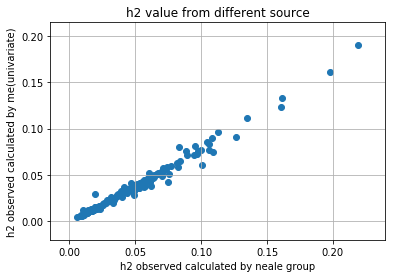

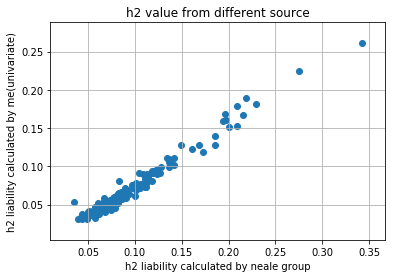

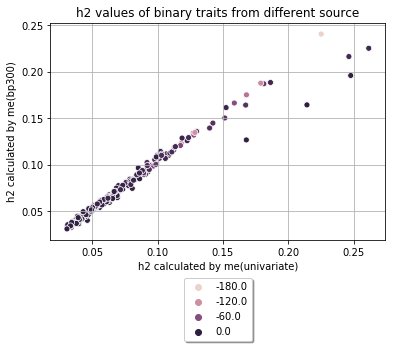

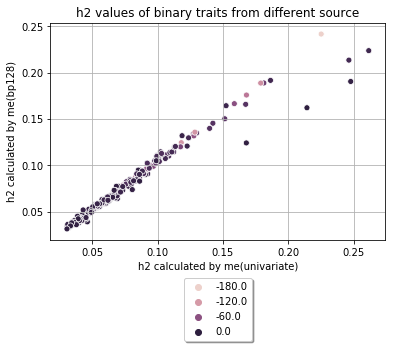

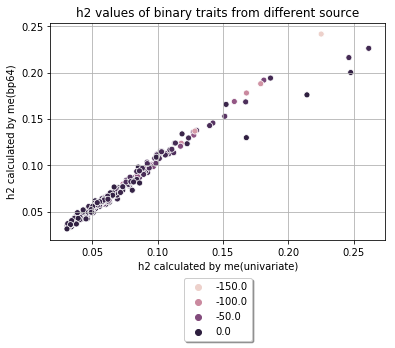

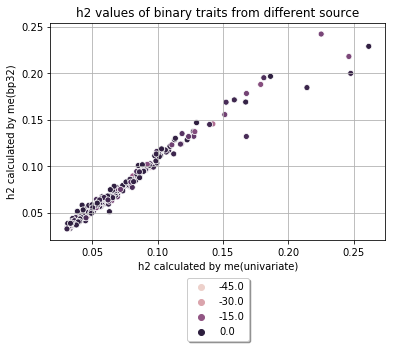

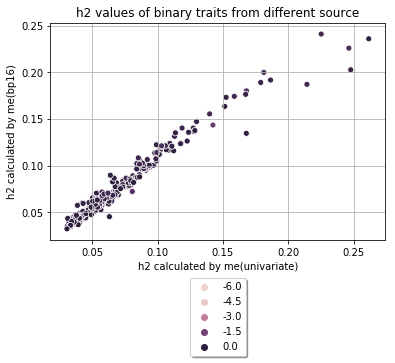

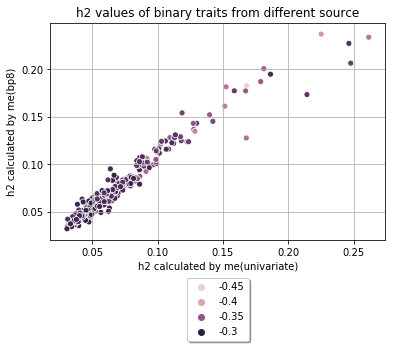

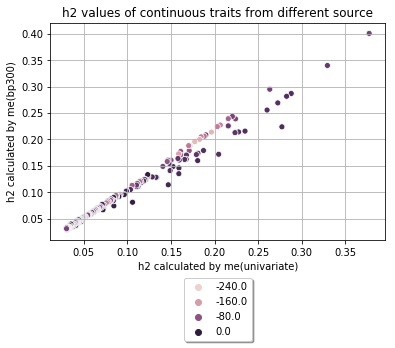

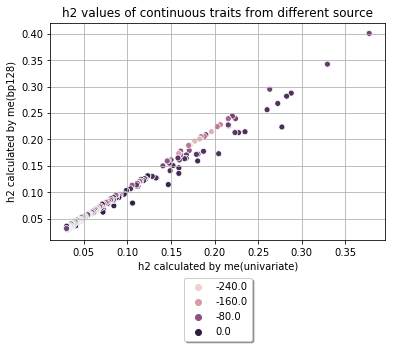

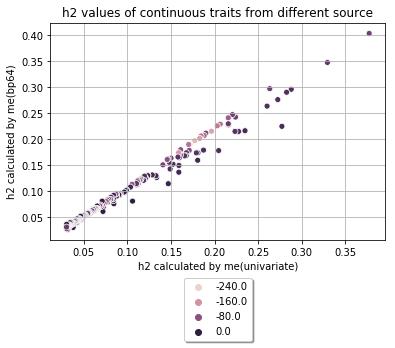

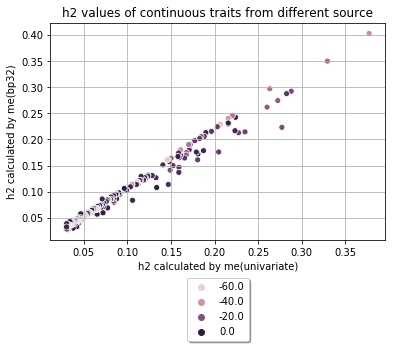

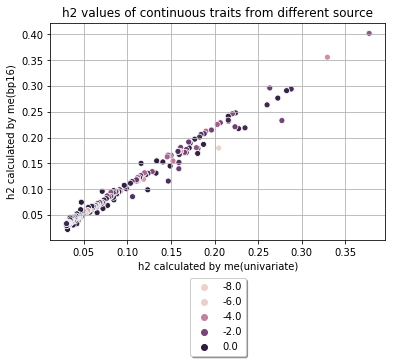

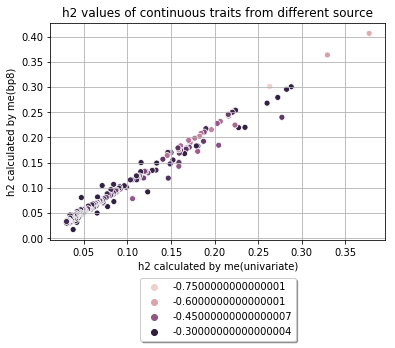

In [20]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
"""
plt.rcParams['axes.grid'] = True



plt.title("h2 value from different source")
plt.scatter(h2_total['neale.h2_observed'], h2_total['uni.Total Observed scale h2'])
plt.xlabel("h2 observed calculated by neale group")
plt.ylabel("h2 observed calculated by me(univariate)")
plt.show()

plt.title("h2 value from different source")
plt.scatter(h2_total['neale.h2_liability'], h2_total['uni.Total Liability scale h2'])
plt.xlabel("h2 liability calculated by neale group")
plt.ylabel("h2 liability calculated by me(univariate)")
plt.show()


def plot_compare_h2(suffix='cm300',mode='all'):
    if mode=='all':
        idx=h2_total.index
    elif mode=='continuous':
        idx=h2_total[h2_total['uni.Total Liability scale h2']==h2_total['uni.Total Observed scale h2']].index
    elif mode=='binary':
        idx=h2_total[h2_total['uni.Total Liability scale h2']!=h2_total['uni.Total Observed scale h2']].index
        
    x_data=h2_total.loc[idx]['uni.Total Liability scale h2']
    y_data=h2_total.loc[idx]['{}.Total Liability scale h2'.format(suffix)]
    #x_data=h2_total[idx]['uni.Total Observed scale h2']
    #y_data=h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]
    #c=h2_total[idx]['cm300.Total Liability scale h2']/h2_total[idx]['cm300.Total Observed scale h2']
    #x_data=h2_total[idx]['uni.Total Observed scale h2']*c
    #y_data=h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]*c
    
    hue_data=np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)]))
    
    plt.title("h2 values of {} traits from different source".format(mode))
    sns.scatterplot(x_data,y_data,hue=hue_data)
    plt.xlabel("h2 calculated by me(univariate)")
    plt.ylabel("h2 calculated by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()

    

    
for suffix in suffix_bp_list_full:
    plot_compare_h2(suffix,mode='binary')

    
for suffix in suffix_bp_list_full:
    plot_compare_h2(suffix,mode='continuous')
#plot_compare_h2("cm15")
#plot_compare_h2("cm10")
#plot_compare_h2("cm2")


In [ ]:
h2_total_corr=h2_total.corr()

In [ ]:
h2_total_corr['neale.h2_liability']['uni.Total Liability scale h2']

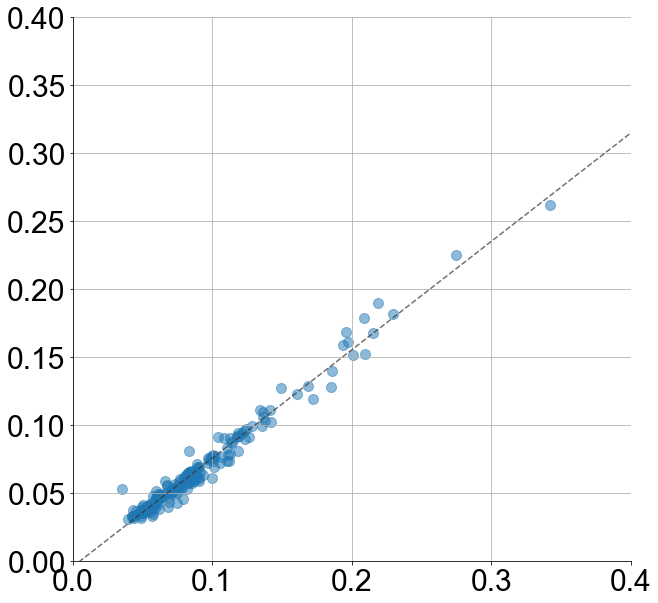

In [24]:
from numpy.polynomial.polynomial import polyfit

plt.rcParams['axes.grid'] = True

plt.rcParams['font.family']='Arial'
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 30


#plt.title("h2 value from different source")
plt.scatter(h2_total['neale.h2_liability'], h2_total['uni.Total Liability scale h2'],alpha=0.5,s=100)

x,y=h2_total['neale.h2_liability'], h2_total['uni.Total Liability scale h2']

x_y=pd.concat([x,y],axis=1)
#x_y.to_csv('polyfit.csv')
x_y.columns=['x','y']
x_y=x_y[~x_y['x'].isna() & ~x_y['y'].isna()]
b, m = polyfit(x_y['x'], x_y['y'], 1)

x_range=np.arange(0,0.45,0.01)
plt.plot(x_range, b + m * x_range, '--',c=(0.2,0.2,0.2,0.7))

plt.title("")
plt.xlabel("")
plt.ylabel("")
sns.despine()

plt.xlim((0,0.4))
plt.ylim((0,0.4))
plt.savefig('figs5.svg')
plt.show()



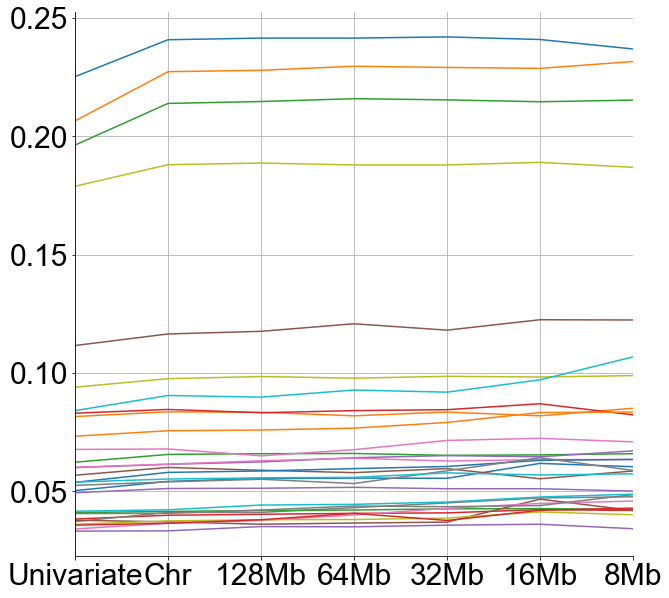

In [30]:
plt.rcParams['font.family']='Arial'
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 30


def plot_compare_h2(suffix_list='cm300',mode='all'):
    if mode=='all':
        idx_filter=h2_total.index
    elif mode=='continuous':
        idx_filter=h2_total[h2_total['uni.Total Liability scale h2']==h2_total['uni.Total Observed scale h2']].index
    elif mode=='binary':
        idx_filter=h2_total[h2_total['uni.Total Liability scale h2']!=h2_total['uni.Total Observed scale h2']].index
    series_list=[]
    series_list.append(h2_total.loc[idx_filter]['uni.Total Liability scale h2'])
    for idx,suffix in enumerate(suffix_list):
        series_list.append(h2_total.loc[idx_filter]['{}.Total Liability scale h2'.format(suffix)])
    df=pd.concat(series_list,axis=1)
    df.columns=['Univariate']+[suffix[2:]+"Mb" if suffix!='bp300' else 'Chr' for suffix in suffix_list]
    df.sample(30).T.plot(legend=None)
    #print(df)
plot_compare_h2(suffix_list=suffix_bp_list_full,mode='all')
plt.savefig('figs6.svg')
sns.despine()

## SE comparison

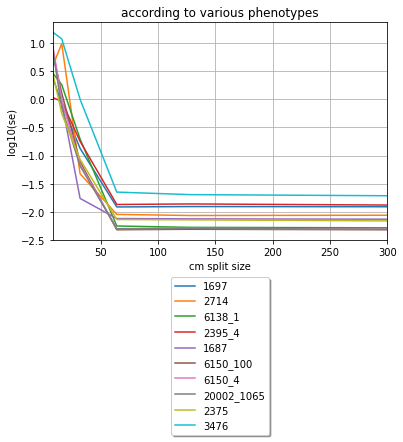

In [20]:
plt.rcParams['axes.grid'] = True

idx=common
df_h2_se=pd.DataFrame([h2_total.loc[idx]['uni.Total Observed scale h2']]+[h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)] for suffix in suffix_bp_list_full]).T
df_se=df_h2_se.sort_values('uni.Total Observed scale h2',ascending=False).iloc[:,1:].T
scale_index=pd.DataFrame(pd.DataFrame(df_se.index.str.split('.').to_list())[0].str.split('bp').to_list())[1].astype(float)
df_se.index=scale_index
df_se

df_se_log=np.log10(df_se.iloc[:,:10])

df_se_log.plot()
plt.title("according to various phenotypes")
plt.xlabel("cm split size")
plt.ylabel("log10(se)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
plt.show()

In [21]:
df_se

phenotype,1697,2714,6138_1,2395_4,1687,6150_100,6150_4,20002_1065,2375,3476,...,20003_1140860696,20002_1138,6154_6,6147_4,20003_1140923346,6179_4,6147_2,20002_1474,20002_1452,6179_6
1,,,,,,,,,,,,,,,,,,,,,
300.0,0.0123,0.0087,0.0052,0.0132,0.0074,0.0048,0.0049,0.0049,0.0069,0.0193,...,0.0014,0.0013,0.0013,0.0014,0.0012,0.0013,0.0012,0.0011,0.0019,0.0012
128.0,0.0124,0.0086,0.0053,0.0138,0.0075,0.0049,0.0051,0.0051,0.0072,0.0202,...,0.0014,0.0013,0.0014,0.0014,0.0013,0.0013,0.0013,0.0012,0.0020,0.0013
64.0,0.0122,0.0090,0.0056,0.0135,0.0076,0.0048,0.0050,0.0050,0.0073,0.0224,...,0.0014,0.0013,0.0016,0.0017,0.0014,0.0014,0.0013,0.0012,0.0021,0.0014
32.0,0.1339,0.0474,0.1962,0.1786,0.0173,0.0771,0.0703,0.0653,0.0853,0.9967,...,0.0025,0.0688,0.0273,0.0484,0.1520,0.0269,0.0425,0.0514,0.0848,0.0767
16.0,0.8264,9.7152,1.8042,0.9120,0.8762,1.2806,0.9595,0.6951,0.5548,11.7856,...,1.0783,1.5836,0.3182,0.3460,1.0120,0.4642,1.6521,4.9296,0.8237,0.2842
8.0,2.4988,3.8103,2.9490,1.0730,8.2388,6.8890,9.4631,8.1724,3.0263,15.5512,...,1.2596,1.0562,1.4344,2.8969,0.9250,0.8986,1.0116,2.2618,1.5706,2.3326


In [22]:
df_se

phenotype,1697,2714,6138_1,2395_4,1687,6150_100,6150_4,20002_1065,2375,3476,...,20003_1140860696,20002_1138,6154_6,6147_4,20003_1140923346,6179_4,6147_2,20002_1474,20002_1452,6179_6
1,,,,,,,,,,,,,,,,,,,,,
300.0,0.0123,0.0087,0.0052,0.0132,0.0074,0.0048,0.0049,0.0049,0.0069,0.0193,...,0.0014,0.0013,0.0013,0.0014,0.0012,0.0013,0.0012,0.0011,0.0019,0.0012
128.0,0.0124,0.0086,0.0053,0.0138,0.0075,0.0049,0.0051,0.0051,0.0072,0.0202,...,0.0014,0.0013,0.0014,0.0014,0.0013,0.0013,0.0013,0.0012,0.0020,0.0013
64.0,0.0122,0.0090,0.0056,0.0135,0.0076,0.0048,0.0050,0.0050,0.0073,0.0224,...,0.0014,0.0013,0.0016,0.0017,0.0014,0.0014,0.0013,0.0012,0.0021,0.0014
32.0,0.1339,0.0474,0.1962,0.1786,0.0173,0.0771,0.0703,0.0653,0.0853,0.9967,...,0.0025,0.0688,0.0273,0.0484,0.1520,0.0269,0.0425,0.0514,0.0848,0.0767
16.0,0.8264,9.7152,1.8042,0.9120,0.8762,1.2806,0.9595,0.6951,0.5548,11.7856,...,1.0783,1.5836,0.3182,0.3460,1.0120,0.4642,1.6521,4.9296,0.8237,0.2842
8.0,2.4988,3.8103,2.9490,1.0730,8.2388,6.8890,9.4631,8.1724,3.0263,15.5512,...,1.2596,1.0562,1.4344,2.8969,0.9250,0.8986,1.0116,2.2618,1.5706,2.3326


In [23]:
for suffix in suffix_bp_list_full:
    print(suffix,len(search_col(h2_total.columns,['{}.Categories'.format(suffix)])))

bp300 22
bp128 34
bp64 55
bp32 100
bp16 185
bp8 357


## h2 p value comparison

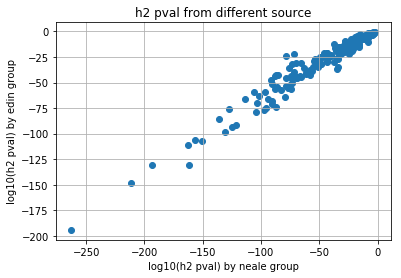

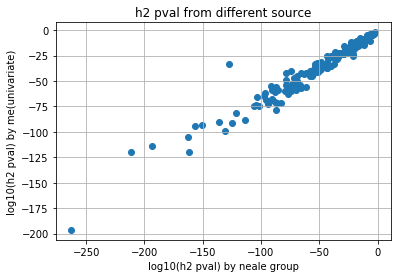

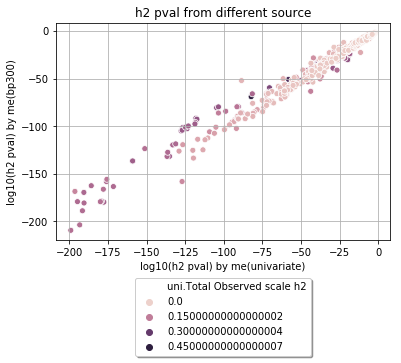

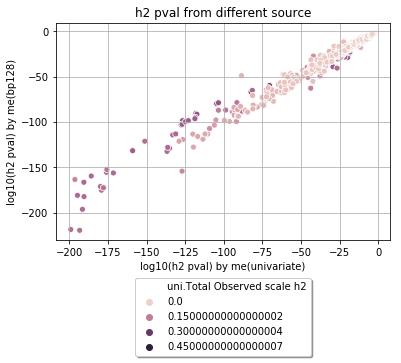

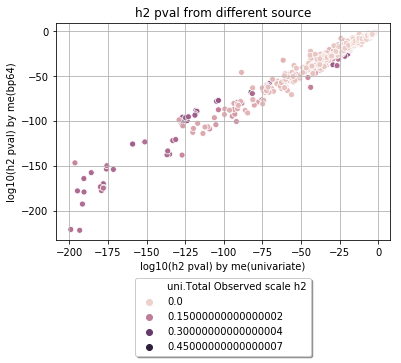

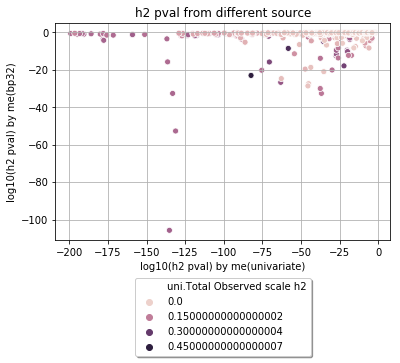

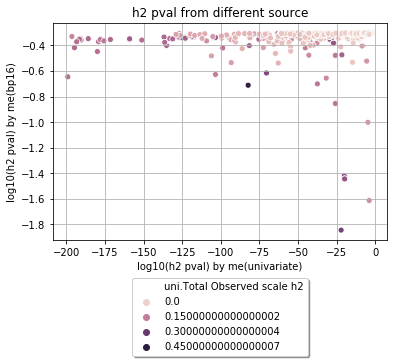

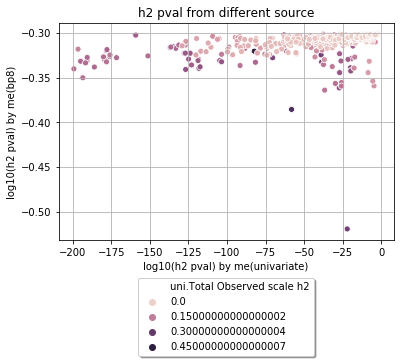

In [24]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
"""
plt.rcParams['axes.grid'] = True


plt.title("h2 pval from different source")
plt.scatter(np.log10(h2_total['neale.h2_p']), np.log10(h2_total['web.h2_p']))
plt.xlabel("log10(h2 pval) by neale group")
plt.ylabel("log10(h2 pval) by edin group")
plt.show()

plt.title("h2 pval from different source")
plt.scatter(np.log10(h2_total['neale.h2_p']), np.log10(st.norm.sf(h2_total['uni.Total Observed scale h2']/h2_total['uni.Total Observed scale h2_se'])))
plt.xlabel("log10(h2 pval) by neale group")
plt.ylabel("log10(h2 pval) by me(univariate)")
plt.show()

idx=h2_total.columns

def plot_compare_h2_p(suffix='cm300'):

    #h2_total[idx]['myuni.Total Observed scale h2']
    
    plt.title("h2 pval from different source")
    x_data=np.log10(st.norm.sf(h2_total[idx]['uni.Total Observed scale h2']/h2_total[idx]['uni.Total Observed scale h2_se']))
    y_data=np.log10(st.norm.sf(h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]))
    hue_data=h2_total[idx]['uni.Total Observed scale h2']
    sns.scatterplot(x=x_data,y=y_data,hue=hue_data)
    #plt.scatter(np.log10(st.norm.sf(h2_total.loc[idx]['myuni.Total Observed scale h2']/h2_total.loc[idx]['myuni.Total Observed scale h2_se'])),np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)])))
    plt.xlabel("log10(h2 pval) by me(univariate)")
    plt.ylabel("log10(h2 pval) by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()

    
for suffix in suffix_bp_list_full:    
    plot_compare_h2_p(suffix)

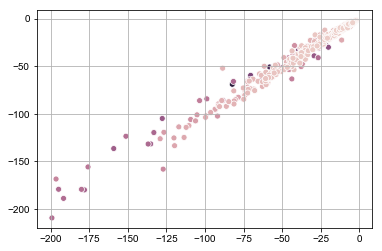

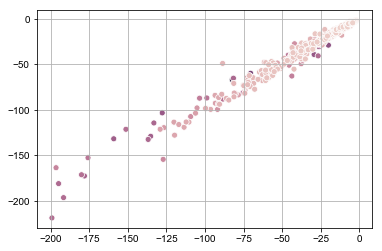

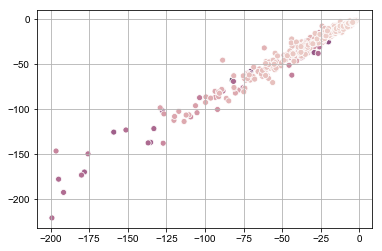

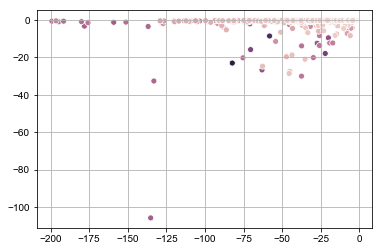

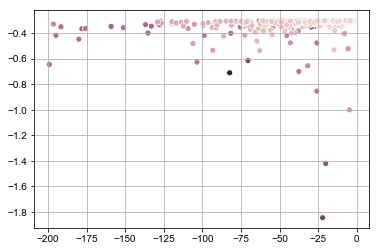

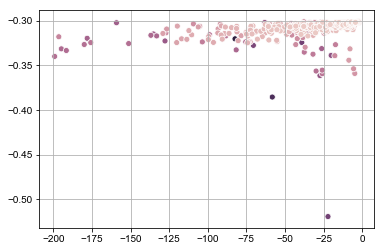

In [50]:
idx=h2_total.columns
def plot_compare_h2_p(suffix='cm300'):

    #h2_total[idx]['myuni.Total Observed scale h2']
    
    plt.title("")#plt.title("h2 pval from different source")
    x_data=np.log10(st.norm.sf(h2_total[idx]['uni.Total Observed scale h2']/h2_total[idx]['uni.Total Observed scale h2_se']))
    y_data=np.log10(st.norm.sf(h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]))
    hue_data=h2_total[idx]['uni.Total Observed scale h2']
    sns.scatterplot(x=x_data,y=y_data,hue=hue_data,legend=None)
    #plt.scatter(np.log10(st.norm.sf(h2_total.loc[idx]['myuni.Total Observed scale h2']/h2_total.loc[idx]['myuni.Total Observed scale h2_se'])),np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)])))
    plt.xlabel("")#plt.xlabel("log10(h2 pval) by me(univariate)")
    plt.ylabel("")#plt.ylabel("log10(h2 pval) by me({})".format(suffix))
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()

    
for suffix in suffix_bp_list_full:    
    plot_compare_h2_p(suffix)

## h2 z score comparison

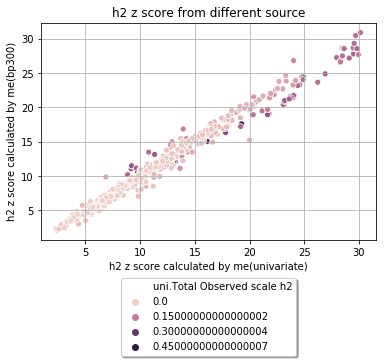

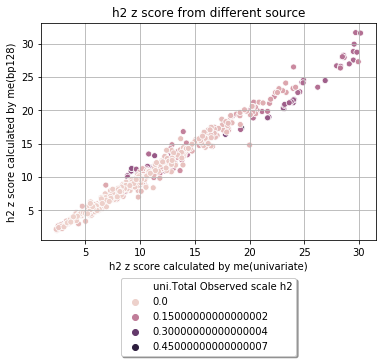

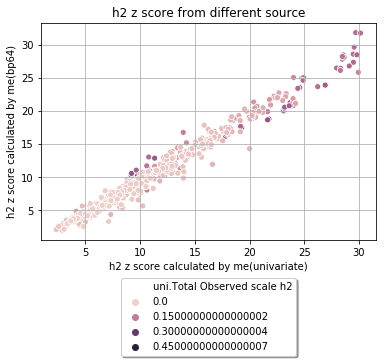

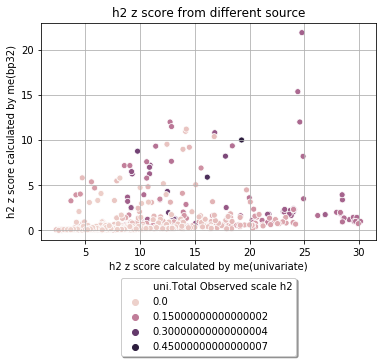

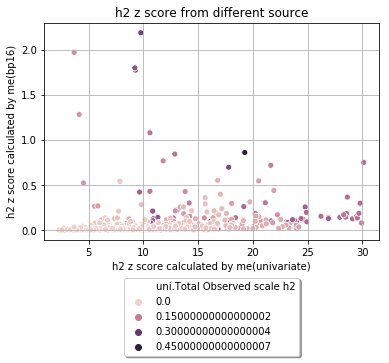

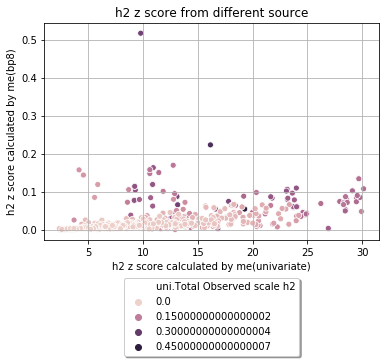

In [25]:

plt.rcParams['axes.grid'] = True

idx=h2_total.columns


def plot_compare_h2_z(suffix='cm300'):
    #h2_total[idx]['myuni.Total Observed scale h2']
    
    plt.title("h2 z score from different source")
    x_data=h2_total[idx]['uni.Total Observed scale h2']/h2_total[idx]['uni.Total Observed scale h2_se']
    y_data=h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]
    hue_data=h2_total[idx]['uni.Total Observed scale h2']
    sns.scatterplot(x=x_data,y=y_data,hue=hue_data)
    #plt.scatter(np.log10(st.norm.sf(h2_total.loc[idx]['myuni.Total Observed scale h2']/h2_total.loc[idx]['myuni.Total Observed scale h2_se'])),np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)])))
    plt.xlabel("h2 z score calculated by me(univariate)")
    plt.ylabel("h2 z score calculated by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()


for suffix in suffix_bp_list_full:
    plot_compare_h2_z(suffix)

In [51]:
h2_total.shape

(497, 7628)

In [53]:
suffix_bp_list_full

['bp300', 'bp128', 'bp64', 'bp32', 'bp16', 'bp8']

In [60]:
for suffix in suffix_bp_list_full:
    ratio=h2_total['{}.Intercept'.format(suffix)]/h2_total['uni.Intercept']
    print(suffix,ratio.mean())


bp300 0.991666071283975
bp128 0.9910530826816228
bp64 0.9896845498008359
bp32 0.9889778853147939
bp16 0.9867786997577576
bp8 0.9852809834085625


## Intercept comparison

KeyError: 'web.intercept'

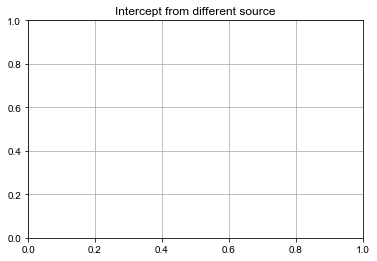

In [31]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

"""
plt.rcParams['axes.grid'] = True

idx=h2_total.columns

plt.title("Intercept from different source")
plt.scatter(h2_total[idx]['neale.intercept'], h2_total[idx]['web.intercept'])
plt.xlabel("Intercept calculated by neale group")
plt.ylabel("Intercept calculated by edin")
plt.show()

plt.title("Intercept from different source")
plt.scatter(h2_total[idx]['neale.intercept'], h2_total[idx]['uni.Intercept'])
plt.xlabel("Intercept calculated by neale group")
plt.ylabel("Intercept calculated by me(univariate)")
plt.show()

def plot_compare_intercept(suffix='cm300'):
    #h2_total[idx]['myuni.Total Observed scale h2']
    
    plt.title("Intercept from different source")
    x_data=h2_total[idx]['uni.Intercept']
    y_data=h2_total[idx]['{}.Intercept'.format(suffix)]
    hue_data=h2_total[idx]['uni.Total Observed scale h2']
    sns.scatterplot(x=x_data,y=y_data,hue=hue_data)
    #plt.scatter(np.log10(st.norm.sf(h2_total.loc[idx]['myuni.Total Observed scale h2']/h2_total.loc[idx]['myuni.Total Observed scale h2_se'])),np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)])))
    plt.xlabel("Intercept calculated by me(univariate)")
    plt.ylabel("Intercept calculated by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()


for suffix in suffix_bp_list_full:
    plot_compare_intercept(suffix)

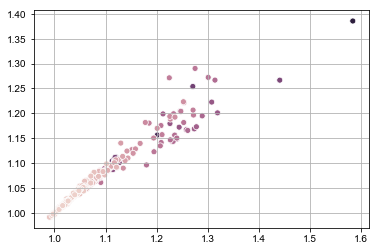

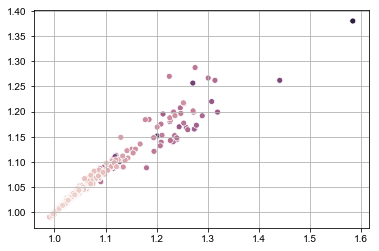

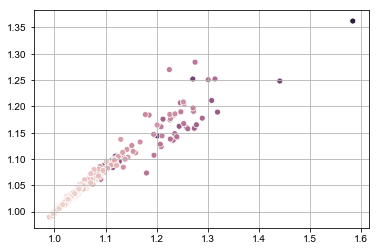

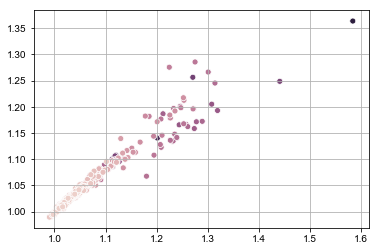

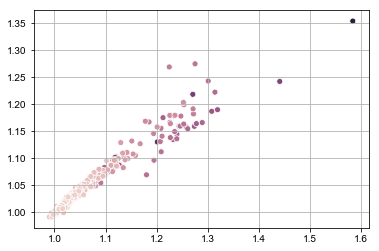

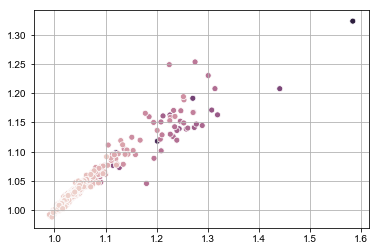

In [52]:
def plot_compare_intercept(suffix='cm300'):
    #h2_total[idx]['myuni.Total Observed scale h2']
    
    plt.title("")#plt.title("Intercept from different source")
    x_data=h2_total[idx]['uni.Intercept']
    y_data=h2_total[idx]['{}.Intercept'.format(suffix)]
    hue_data=h2_total[idx]['uni.Total Observed scale h2']
    sns.scatterplot(x=x_data,y=y_data,hue=hue_data,legend=None)
    #plt.scatter(np.log10(st.norm.sf(h2_total.loc[idx]['myuni.Total Observed scale h2']/h2_total.loc[idx]['myuni.Total Observed scale h2_se'])),np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)])))
    plt.xlabel("")#plt.xlabel("Intercept calculated by me(univariate)")
    plt.ylabel("")#plt.ylabel("Intercept calculated by me({})".format(suffix))
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()


for suffix in suffix_bp_list_full:
    plot_compare_intercept(suffix)

In [80]:
df.mean()[0]/df.mean()[-1]

1.0163761204165662

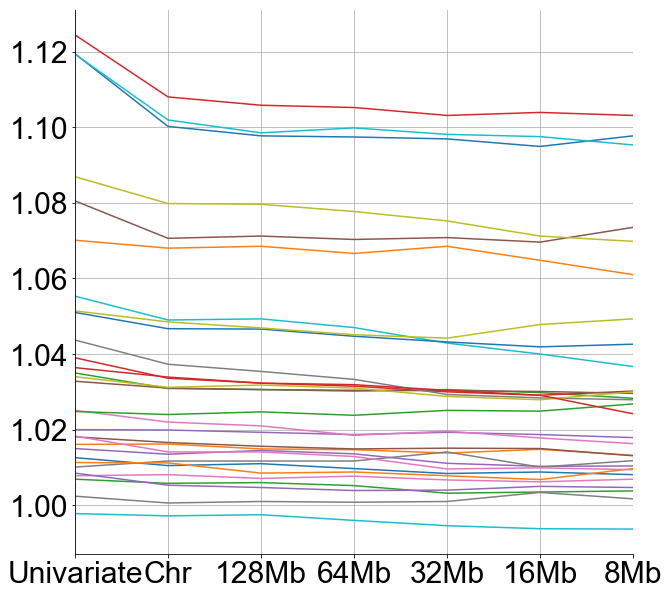

In [117]:
plt.rcParams['font.family']='Arial'
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 30


def plot_compare_intercept(suffix_list='cm300',mode='all'):
    if mode=='all':
        idx_filter=h2_total.index
    elif mode=='continuous':
        idx_filter=h2_total[h2_total['uni.Total Liability scale h2']==h2_total['uni.Total Observed scale h2']].index
    elif mode=='binary':
        idx_filter=h2_total[h2_total['uni.Total Liability scale h2']!=h2_total['uni.Total Observed scale h2']].index
    series_list=[]
    series_list.append(h2_total.loc[idx_filter]['uni.Intercept'])
    for idx,suffix in enumerate(suffix_list):
        series_list.append(h2_total.loc[idx_filter]['{}.Intercept'.format(suffix)])
    df=pd.concat(series_list,axis=1)
    df.columns=['Univariate']+[suffix[2:]+"Mb" if suffix!='bp300' else 'Chr' for suffix in suffix_list]
    df.sample(30).T.plot(legend=None)
    return df
df=plot_compare_intercept(suffix_list=suffix_bp_list_full,mode='all')
plt.savefig('fig_s_7.svg')
sns.despine()

## h2 vs h2 z (for future usage)

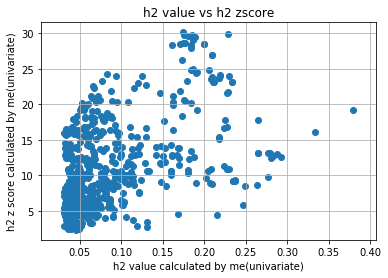

In [27]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
"""
plt.rcParams['axes.grid'] = True

#ax.legend()
#ax.grid(True)

idx=h2_total.columns

plt.title("h2 value vs h2 zscore")
plt.scatter(h2_total[idx]['uni.Total Liability scale h2'],h2_total[idx]['uni.Total Observed scale h2']/h2_total[idx]['uni.Total Observed scale h2_se'])
#plt.scatter(h2_total['myuni.Total Observed scale h2'],h2_total['myuni.Total Observed scale h2']/h2_total['myuni.Total Observed scale h2_se'])
plt.xlabel("h2 value calculated by me(univariate)")
plt.ylabel("h2 z score calculated by me(univariate)")
plt.show()

## Basic QC

In [28]:
#h2_total_backup=h2_total.copy()
#h2_total=h2_total_backup

In [29]:
h2_total.shape

(562, 7628)

In [30]:
h2_total_filtered=h2_total.copy()

In [31]:
h2_total.index

Index(['50_irnt', '20153_irnt', '20015_irnt', '5097_irnt', '5098_irnt',
       '5133_irnt', '5134_irnt', '5096_irnt', '5099_irnt', '23101_irnt',
       ...
       '6179_4', '20002_1474', '20002_1452', 'N39', 'K11_OTHGASTR', '6179_6',
       '6144_1', '680_4', 'K44', 'Z09'],
      dtype='object', name='phenotype', length=562)

In [32]:
h2_total_filtered[h2_total_filtered.index=='50']

,bp300.filename,bp300.Total Observed scale h2,bp300.Total Observed scale h2_se,bp300.Total Liability scale h2,bp300.Total Liability scale h2_se,bp300.Lambda GC,bp300.Mean Chi^2,bp300.Intercept,bp300.Intercept_se,bp300.Ratio,...,neale.h2_liability_se,neale.h2_z,neale.h2_p,web.description,web.n_non_missing,web.prev,web.intercept,web.intercept p,web.h2,web.h2_p
phenotype,,,,,,,,,,,,,,,,,,,,,


In [33]:
print(h2_total_filtered.shape)
h2_total_filtered=h2_total_filtered[phenotypes_uni_filtered['source']!='biomarkers']
print(h2_total_filtered.shape)

(562, 7628)
(562, 7628)


/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [34]:
print(h2_total_filtered.shape)
h2_total_filtered=h2_total_filtered[np.logical_or(phenotypes_uni_filtered['n_effective']>4000,phenotypes_uni_filtered['n_effective'].isnull())]
print(h2_total_filtered.shape)

(562, 7628)


KeyError: 'n_effective'

In [35]:
print(h2_total_filtered.shape)
h2_total_filtered=h2_total_filtered[np.logical_and(h2_total_filtered['uni.Total Liability scale h2']>0.03,h2_total_filtered['cm8.Total Liability scale h2']>0.03)]
print(h2_total_filtered.shape)

(562, 7628)


KeyError: 'cm8.Total Liability scale h2'

In [36]:
print(h2_total_filtered.shape)
h2_total_filtered=h2_total_filtered[h2_total_filtered['uni.Total h2 p']<0.01]
print(h2_total_filtered.shape)

(562, 7628)
(562, 7628)


In [37]:
#h2_total_filtered.to_csv(h2_total_filtered_path)

case/control trait의 경우

cm세밀하게 할 때, total keep 안되는 경우가 많으며,
여러 source(web,neale blog,my)간 차이가 큰 경우가 있다.


In [ ]:
temp=h2_total_filtered.merge(phenotypes_uni_filtered,on='phenotype')

In [ ]:
x_data=temp['uni.Total Liability scale h2']
y_data=temp['cm8.Total Liability scale h2']

plt.scatter(x_data,y_data)

In [ ]:
x_data=temp['uni.Total Observed scale h2']
y_data=temp['cm8.Total Observed scale h2']

plt.scatter(x_data,y_data)

In [ ]:
x_data=temp['n_cases']
y_data=temp['uni.Total Liability scale h2']-temp['cm8.Total Liability scale h2']

plt.scatter(x_data,y_data)

In [ ]:
x_data=temp['n_effective']
y_data=temp['uni.Total Liability scale h2_se']

plt.scatter(x_data,y_data)

In [ ]:
x_data=temp[temp['n_effective']>5000]['n_effective']
y_data=temp[temp['n_effective']>5000]['uni.Total Liability scale h2']-temp[temp['n_effective']>5000]['cm8.Total Liability scale h2']

plt.scatter(x_data,y_data),x_data.shape

In [ ]:
x_data=temp[temp['n_effective']>0]['n_effective']
y_data=temp[temp['n_effective']>0]['uni.Total Liability scale h2']-temp[temp['n_effective']>0]['cm8.Total Liability scale h2']

plt.scatter(x_data,y_data)

In [ ]:
x_data=temp['uni.Total Liability scale h2_se']/temp['uni.Total Liability scale h2']
y_data=temp['uni.Total Liability scale h2']-temp['cm8.Total Liability scale h2']

plt.scatter(x_data,y_data)

In [ ]:
x_data=temp['uni.Total Liability scale h2']/temp['uni.Total Liability scale h2_se']
y_data=temp['uni.Total Liability scale h2']-temp['cm8.Total Liability scale h2']

plt.scatter(x_data,y_data)

In [ ]:
x_data=temp['uni.Total Liability scale h2']
y_data=temp['uni.Total Liability scale h2']-temp['cm8.Total Liability scale h2']

plt.scatter(x_data,y_data)

In [ ]:
x_data=temp['uni.Total Liability scale h2_se']
y_data=temp['uni.Total Liability scale h2']-temp['cm8.Total Liability scale h2']

plt.scatter(x_data,y_data)

# Verification

## h2 value comparison

NameError: name 'h2_total_filtered' is not defined

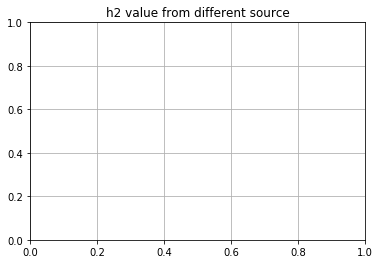

In [16]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
"""
plt.rcParams['axes.grid'] = True



plt.title("h2 value from different source")
plt.scatter(h2_total_filtered['neale.h2_observed'], h2_total_filtered['web.h2'])
plt.xlabel("h2 observed calculated by neale group")
plt.ylabel("h2 from web")
plt.show()

plt.title("h2 value from different source")
plt.scatter(h2_total_filtered['neale.h2_liability'], h2_total_filtered['web.h2'])
plt.xlabel("h2 liability calculated by neale group")
plt.ylabel("h2 from web")
plt.show()

plt.title("h2 value from different source")
plt.scatter(h2_total_filtered['neale.h2_observed'], h2_total_filtered['uni.Total Observed scale h2'])
plt.xlabel("h2 observed calculated by neale group")
plt.ylabel("h2 observed calculated by me(univariate)")
plt.show()

plt.title("h2 value from different source")
plt.scatter(h2_total_filtered['neale.h2_liability'], h2_total_filtered['uni.Total Liability scale h2'])
plt.xlabel("h2 liability calculated by neale group")
plt.ylabel("h2 liability calculated by me(univariate)")
plt.show()

idx=h2_total.columns
def plot_compare_h2(suffix='cm300',mode='all'):
    if mode=='all':
        idx=h2_total_filtered.index
    elif mode=='continuous':
        idx=h2_total_filtered[h2_total_filtered['uni.Total Liability scale h2']==h2_total_filtered['uni.Total Observed scale h2']].index
    elif mode=='binary':
        idx=h2_total_filtered[h2_total_filtered['uni.Total Liability scale h2']!=h2_total_filtered['uni.Total Observed scale h2']].index
        
    x_data=h2_total_filtered.loc[idx]['uni.Total Liability scale h2']
    y_data=h2_total_filtered.loc[idx]['{}.Total Liability scale h2'.format(suffix)]
    #x_data=h2_total[idx]['uni.Total Observed scale h2']
    #y_data=h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]
    #c=h2_total[idx]['cm300.Total Liability scale h2']/h2_total[idx]['cm300.Total Observed scale h2']
    #x_data=h2_total[idx]['uni.Total Observed scale h2']*c
    #y_data=h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]*c
    
    hue_data=np.log10(st.norm.sf(h2_total_filtered.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total_filtered.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)]))
    
    plt.title("h2 values of {} traits from different source".format(mode))
    sns.scatterplot(x_data,y_data,hue=hue_data)
    plt.xlabel("h2 calculated by me(univariate)")
    plt.ylabel("h2 calculated by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)

    plt.xlim(0)
    plt.ylim(0)
    plt.show()

    
for suffix in suffix_cm_list:
    plot_compare_h2(suffix,mode='binary')

for suffix in suffix_bp_list:
    plot_compare_h2(suffix,mode='binary')
    
for suffix in suffix_lb_list:
    plot_compare_h2(suffix,mode='binary')
#plot_compare_h2("cm15")
#plot_compare_h2("cm10")
#plot_compare_h2("cm2")


## SE comparison

In [ ]:
plt.rcParams['axes.grid'] = True

#idx=h2_total_filtered.in
df_h2_se=pd.DataFrame([h2_total_filtered['uni.Total Observed scale h2']]+[h2_total_filtered['{}.Total Observed scale h2_se'.format(suffix)] for suffix in suffix_cm_list]).T
df_se=df_h2_se.sort_values('uni.Total Observed scale h2',ascending=False).iloc[:,1:].T
scale_index=pd.DataFrame(pd.DataFrame(df_se.index.str.split('.').to_list())[0].str.split('cm').to_list())[1].astype(float)
df_se.index=scale_index
df_se

df_se_log=np.log10(df_se.iloc[:,:100])

df_se_log.plot()
plt.title("according to various phenotypes")
plt.xlabel("cm split size")
plt.ylabel("log10(se)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
plt.show()

In [ ]:
plt.rcParams['axes.grid'] = True

#idx=h2_total_filtered.in
df_h2_se=pd.DataFrame([h2_total_filtered['uni.Total Observed scale h2']]+[h2_total_filtered['{}.Total Observed scale h2_se'.format(suffix)] for suffix in suffix_bp_list]).T
df_se=df_h2_se.sort_values('uni.Total Observed scale h2',ascending=False).iloc[:,1:].T
scale_index=pd.DataFrame(pd.DataFrame(df_se.index.str.split('.').to_list())[0].str.split('bp').to_list())[1].astype(float)
df_se.index=scale_index
df_se

df_se_log=np.log10(df_se.iloc[:,:100])

df_se_log.plot()
plt.title("according to various phenotypes")
plt.xlabel("cm split size")
plt.ylabel("log10(se)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
plt.show()

In [ ]:
plt.rcParams['axes.grid'] = True

#idx=h2_total_filtered.in
df_h2_se=pd.DataFrame([h2_total_filtered['uni.Total Observed scale h2']]+[h2_total_filtered['{}.Total Observed scale h2_se'.format(suffix)] for suffix in suffix_lb_list]).T
df_se=df_h2_se.sort_values('uni.Total Observed scale h2',ascending=False).iloc[:,1:].T
scale_index=pd.DataFrame(pd.DataFrame(df_se.index.str.split('.').to_list())[0].str.split('lb').to_list())[1].astype(float)
df_se.index=scale_index
df_se

df_se_log=np.log10(df_se.iloc[:,:100])

df_se_log.plot()
plt.title("according to various phenotypes")
plt.xlabel("cm split size")
plt.ylabel("log10(se)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
plt.show()

In [ ]:
df_se

## h2 p value comparison

In [ ]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
"""
plt.rcParams['axes.grid'] = True


plt.title("h2 pval from different source")
plt.scatter(np.log10(h2_total_filtered['neale.h2_p']), np.log10(h2_total_filtered['web.h2_p']))
plt.xlabel("log10(h2 pval) by neale group")
plt.ylabel("log10(h2 pval) by edin group")
plt.show()

plt.title("h2 pval from different source")
plt.scatter(np.log10(h2_total_filtered['neale.h2_p']), np.log10(st.norm.sf(h2_total_filtered['uni.Total Observed scale h2']/h2_total_filtered['uni.Total Observed scale h2_se'])))
plt.xlabel("log10(h2 pval) by neale group")
plt.ylabel("log10(h2 pval) by me(univariate)")
plt.show()

idx=h2_total_filtered.columns

def plot_compare_h2_p(suffix='cm300'):

    #h2_total[idx]['myuni.Total Observed scale h2']
    
    plt.title("h2 pval from different source")
    x_data=np.log10(st.norm.sf(h2_total_filtered[idx]['uni.Total Observed scale h2']/h2_total_filtered[idx]['uni.Total Observed scale h2_se']))
    y_data=np.log10(st.norm.sf(h2_total_filtered[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total_filtered[idx]['{}.Total Observed scale h2_se'.format(suffix)]))
    hue_data=h2_total_filtered[idx]['uni.Total Observed scale h2']
    sns.scatterplot(x=x_data,y=y_data,hue=hue_data)
    #plt.scatter(np.log10(st.norm.sf(h2_total.loc[idx]['myuni.Total Observed scale h2']/h2_total.loc[idx]['myuni.Total Observed scale h2_se'])),np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)])))
    plt.xlabel("log10(h2 pval) by me(univariate)")
    plt.ylabel("log10(h2 pval) by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()

for suffix in suffix_list:    
    plot_compare_h2_p(suffix)


## h2 z score comparison

In [ ]:

plt.rcParams['axes.grid'] = True

idx=h2_total_filtered.columns


def plot_compare_h2_z(suffix='cm300'):
    #h2_total[idx]['myuni.Total Observed scale h2']
    
    plt.title("h2 z score from different source")
    x_data=h2_total_filtered[idx]['uni.Total Observed scale h2']/h2_total_filtered[idx]['uni.Total Observed scale h2_se']
    y_data=h2_total_filtered[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total_filtered[idx]['{}.Total Observed scale h2_se'.format(suffix)]
    hue_data=h2_total_filtered[idx]['uni.Total Observed scale h2']
    sns.scatterplot(x=x_data,y=y_data,hue=hue_data)
    #plt.scatter(np.log10(st.norm.sf(h2_total.loc[idx]['myuni.Total Observed scale h2']/h2_total.loc[idx]['myuni.Total Observed scale h2_se'])),np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)])))
    plt.xlabel("h2 z score calculated by me(univariate)")
    plt.ylabel("h2 z score calculated by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()


for suffix in suffix_list:
    plot_compare_h2_z(suffix)

## Intercept comparison

In [ ]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

"""
plt.rcParams['axes.grid'] = True

idx=h2_total.columns

plt.title("Intercept from different source")
plt.scatter(h2_total_filtered[idx]['neale.intercept'], h2_total_filtered[idx]['web.intercept'])
plt.xlabel("Intercept calculated by neale group")
plt.ylabel("Intercept calculated by edin")
plt.show()

plt.title("Intercept from different source")
plt.scatter(h2_total_filtered[idx]['neale.intercept'], h2_total_filtered[idx]['uni.Intercept'])
plt.xlabel("Intercept calculated by neale group")
plt.ylabel("Intercept calculated by me(univariate)")
plt.show()

def plot_compare_h2_z(suffix='cm300'):
    #h2_total[idx]['myuni.Total Observed scale h2']
    
    plt.title("Intercept from different source")
    x_data=h2_total_filtered[idx]['uni.Intercept']
    y_data=h2_total_filtered[idx]['{}.Intercept'.format(suffix)]
    hue_data=h2_total_filtered[idx]['uni.Total Observed scale h2']
    sns.scatterplot(x=x_data,y=y_data,hue=hue_data)
    #plt.scatter(np.log10(st.norm.sf(h2_total.loc[idx]['myuni.Total Observed scale h2']/h2_total.loc[idx]['myuni.Total Observed scale h2_se'])),np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)])))
    plt.xlabel("Intercept calculated by me(univariate)")
    plt.ylabel("Intercept calculated by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()


for suffix in suffix_cm_list:
    plot_compare_h2_z(suffix)
for suffix in suffix_lb_list:
    plot_compare_h2_z(suffix)

## h2 vs h2 z (for future usage)

In [ ]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
"""
plt.rcParams['axes.grid'] = True

#ax.legend()
#ax.grid(True)

idx=h2_total_filtered.columns

plt.title("h2 value vs h2 zscore")
plt.scatter(h2_total_filtered[idx]['uni.Total Liability scale h2'],h2_total_filtered[idx]['uni.Total Observed scale h2']/h2_total_filtered[idx]['uni.Total Observed scale h2_se'])
#plt.scatter(h2_total['myuni.Total Observed scale h2'],h2_total['myuni.Total Observed scale h2']/h2_total['myuni.Total Observed scale h2_se'])
plt.xlabel("h2 value calculated by me(univariate)")
plt.ylabel("h2 z score calculated by me(univariate)")
plt.show()

## Verification using manhattan plot, LDSC regresssion 2D plot

### functions for plotting real manhattan plot

In [ ]:
def manhattan_plot(sumstats,option={}):
    sumstats=sumstats_filter(sumstats,option)
    
    max_cm={1:294,10:184,11:162,12:176,13:130,14:117,15:151,16:132,17:129,18:121,19:107,2:275,20:111,21:65,22:76,3:228,4:221,5:209,6:199,7:191,8:179,9:181}
    max_cm=[max_cm[i] for i in range(1,22+1)]
    sumstats['CMcoord']=sumstats['CHR']+sumstats['CM']/(pd.Series(max_cm).loc[sumstats['CHR']-1]).values
    sumstats['pval']=-np.log10(st.norm.sf(np.abs(sumstats['Z'])))
    
    #print(sumstats['CMcoord'])
    sns.scatterplot(x=sumstats['CMcoord'],y=sumstats['pval'],marker='x')#s=10)

    plt.title("Manhattan")
    plt.xlabel("chrN.cm_coord")
    plt.ylabel("-log10(pval)")
    
    if len(option)==0:
        plt.xlim(left=1,right=23)
        #plt.xlim(=23)
    
    plt.show()


### functions for plotting manhattan plot (heritability ver.)

In [ ]:
def log_negative(series):
    nidx=series<0
    a=-np.log10(-pd.to_numeric(series[nidx]))
    b=np.log10(pd.to_numeric(series[np.logical_not(nidx)]))
    return pd.concat([a,b]).reindex(series.index)

In [ ]:
def ldsc_manhattan_plot(h2_total,pheno_code,suffix,compensate=0,mode='h2_p',viewfilter=[''],excludefilter=[]):

    selected=h2_total.loc[pheno_code]
    par_h2_cnames=search_col(selected.index,[suffix+'.Observed scale h2.'])
    par_h2=selected[par_h2_cnames]
    par_h2.index=index_format(par_h2.index,'minimal')

    par_h2se_cnames=search_col(selected.index,[suffix+'.Observed scale h2 SE.'])
    par_h2se=selected[par_h2se_cnames]
    par_h2se.index=index_format(par_h2se.index,'minimal')
    
    par_h2prop_cnames=search_col(selected.index,[suffix+'.Proportion of h2g.'])
    par_h2prop=selected[par_h2prop_cnames]
    par_h2prop.index=index_format(par_h2prop.index,'minimal')
    #print(par_h2prop)
    par_h2prop_log=log_negative(par_h2prop)
    #print(par_h2prop_log)
    plt.clf()
    plt.rcParams['font.size']=22
    plt.rcParams["figure.figsize"] = (40,10)
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.color'] = 'r'
    plt.rcParams['axes.grid'] = True

    plt.title("Manhattan - "+h2_total['atlas.description'][par_h2.name]+' - '+suffix)
    plt.xlabel("chrN.cm_coord")
    
    
    #plt_text="num_point before/after clipping by ref={}:{}/{}\n".format(ref,len(par_h2prop.index),len(par_h2prop_log.index))
    #plt_text="ref({})+1/log10({})={}\n".format(ref,par_h2.shape[0],ref+np.log10(1/par_h2.shape[0]))
    #par_h2.index=index_format(par_h2.index,'minimal')
    #par_h2se.index=index_format(par_h2se.index,'minimal')
    #par_h2prop.index=index_format(par_h2prop.index,'minimal')
    
    if mode=='2':
        par_h2prop=par_h2prop[search_col(par_h2prop.index,viewfilter)]
        par_h2prop.index=minimal_to_float(par_h2prop.index,compensate)
        (par_h2prop/par_h2prop.iloc[0]).sort_index().plot()
    elif mode=='2':
        par_h2se=1/par_h2se[search_col(par_h2se.index,viewfilter)].astype(float)
        par_h2se.index=minimal_to_float(par_h2se.index,compensate)
        (par_h2se).sort_index().plot()
    elif mode=='3':
        par_h2prop=par_h2prop[search_col(par_h2prop.index,viewfilter)]
        par_h2prop.index=minimal_to_float(par_h2prop.index,compensate)
        
        par_h2se=1/par_h2se[search_col(par_h2se.index,viewfilter)].astype(float)
        par_h2se.index=minimal_to_float(par_h2se.index,compensate)
        
        #par_h2se=1/par_h2se[search_col(par_h2se.index,viewfilter)].astype(float)
        (par_h2prop*par_h2se).sort_index().plot()
    elif mode=='h2_p_semi':
        par_z=pd.to_numeric((par_h2/(par_h2se**(0.3))), errors='coerce')
        #par_pval=pd.Series(par_z,index=par_z.index).sort_index()
        par_pval=pd.Series(-np.log10(st.norm.sf(par_z)),index=par_z.index).sort_index()
        #print(par_pval)
        #print(par_pval.index)
        #print(par_pval.index)
        par_pval=par_pval[search_col(par_pval.index,viewfilter)]
        #par_pval.index=index_format(par_pval.index,'minimal')
        par_pval.index=minimal_to_float(par_pval.index,compensate)
        #print(par_pval)
        par_pval.plot()
        
        plt.ylabel("-log10(semi pval of par h2)")
        #plt.ylim(top=300)
    elif mode=='h2_p':
        par_z=pd.to_numeric((par_h2/par_h2se), errors='coerce')
        #par_pval=pd.Series(par_z,index=par_z.index).sort_index()
        par_pval=pd.Series(-np.log10(st.norm.sf(par_z)),index=par_z.index).sort_index()
        #print(par_pval)
        #print(par_pval.index)
        
        par_pval=par_pval[search_col(par_pval.index,viewfilter)]
        #par_pval.index=index_format(par_pval.index,'minimal')
        par_pval.index=minimal_to_float(par_pval.index,compensate)
        #print(par_pval)
        par_pval.plot()
        
        plt.ylabel("-log10(pval of par h2)")
        #plt.ylim(top=300)
    elif mode=='h2_p_raw':
        par_z=pd.to_numeric((par_h2/(par_h2se**(0.0))), errors='coerce')
        #par_pval=pd.Series(par_z,index=par_z.index).sort_index()
        par_pval=pd.Series(-np.log10(st.norm.sf(par_z)),index=par_z.index).sort_index()
        #print(par_pval)
        #print(par_pval.index)
        #print(par_pval.index)
        par_pval=par_pval[search_col(par_pval.index,viewfilter)]
        #par_pval.index=index_format(par_pval.index,'minimal')
        par_pval.index=minimal_to_float(par_pval.index,compensate)
        #print(par_pval)
        par_pval.plot()
        
        plt.ylabel("-log10(par h2)")
        #plt.ylim(top=300)
        #plt.ylim(top=300)
    elif mode=='h2':
        par_z=pd.to_numeric((par_h2/(par_h2se**(0.0))), errors='coerce')
        #par_pval=pd.Series(par_z,index=par_z.index).sort_index()
        par_pval=pd.Series((par_z),index=par_z.index).sort_index()
        #print(par_pval)
        #print(par_pval.index)
        #print(par_pval.index)
        par_pval=par_pval[search_col(par_pval.index,viewfilter)]
        #par_pval.index=index_format(par_pval.index,'minimal')
        par_pval.index=minimal_to_float(par_pval.index,compensate)
        #print(par_pval)
        par_pval.plot()
        
        plt.ylabel("h2")
        #plt.ylim(top=300)
        #plt.ylim(top=300)
    else:
        raise Exception
    #print(par_pval.index)
    if viewfilter[0]=='':
        plt.xlim(left=1,right=23)
    
    pval=st.norm.sf(h2_total['myuni.Total Observed scale h2'][pheno_code]/h2_total['myuni.Total Observed scale h2_se'][pheno_code])
    plt_text="Total h2={} pval={}\n".format(h2_total['myuni.Total Observed scale h2'][pheno_code],pval)
    plt_text+="Total={} Case={} Control={}".format(h2_total['neale.N'][pheno_code],h2_total['neale.N_case'][pheno_code],h2_total['neale.N_control'][pheno_code])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(plt.xlim()[0], plt.ylim()[1],plt_text,fontsize=20,verticalalignment='top', bbox=props)
    #plt.text(compensate,plt.ylim()[1],s=plt_text,fontsize=20,verticalalignment='top', bbox=props)

    plt.show()
    
#manhattan_plot(h2_total,pheno_code,'cm1',0,['15.','16.','17.'])

### functions to plot LDSC regression plot.

### Let's analyze phenotype of the smallest h2 pvalue

In [ ]:
for i,idx in enumerate(h2_total[common].sort_values('atlas.h2_p').index.to_list()):
    print(idx,"  ",code_to_description(idx),h2_total.loc[idx]['atlas.h2_p'])
    
    if i>30:
        break

### Old ldsc plot code

In [ ]:
plt.rcParams['font.size']=10
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

#ld_bin_par_df[ld_bin_par_df['category']=="'chrN': [4]"]
#sns.scatterplot(x=par_h2prop_log, y=par_pval[par_h2prop_log.index],hue=par_h2_chr,palette=sns.color_palette("hls",22))


sns.scatterplot(x=ld_bin_par_df['ld_quantile'],y=ld_bin_par_df['mean']*ld_bin_par_df['M'],hue=ld_bin_par_df['category'],s=20)#),s=30,marker="+")
ld_bin_par_merged=pd.merge(ld_bin_par_df,regression_result_par_df,on='category')
#sns.lineplot(x=ld_bin_par_merged['ld_quantile'], y=(ld_bin_par_merged['coef']*ld_bin_par_merged['ld_quantile']+ld_bin_par_merged['intercept']+1)*ld_bin_par_merged['M'],hue=ld_bin_par_merged['category'])
sns.lineplot(x=(ld_bin_par_merged['ld_quantile']-ld_bin_par_merged['ld_quantile'].min()), y=(ld_bin_par_merged['coef']*(ld_bin_par_merged['ld_quantile']-ld_bin_par_merged['ld_quantile'].min())+ld_bin_par_merged['intercept']+1)*ld_bin_par_merged['M_x'],hue=ld_bin_par_merged['category'],size=ld_bin_par_merged['score'])

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.title("LDSC Regression of {} - {}".format(h2_total['atlas.description'][pheno_code],pheno_code))
plt.xlabel("LD Score bin per quantile")
plt.ylabel("chisq mean of each LD Score bin")

pval=st.norm.sf(h2_total['myuni.Total Observed scale h2'][pheno_code]/h2_total['myuni.Total Observed scale h2_se'][pheno_code])
h2=coef_to_h2(regression_result_uni['coef'],sumstats_read.N.mean(),regression_result_uni['M'])
plt_text="Total h2={} score(r^2)={}\n".format(h2,regression_result_uni['score'])
plt_text+="Total h2={} pval={} from original LDSC module\n".format(h2_total['myuni.Total Observed scale h2'][pheno_code],pval)
plt_text+="Total={} Case={} Control={}".format(h2_total['neale.N'][pheno_code],h2_total['neale.N_case'][pheno_code],h2_total['neale.N_control'][pheno_code])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0, plt.ylim()[1],plt_text,fontsize=14,verticalalignment='top', bbox=props)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=10,fancybox=True, shadow=True, ncol=10)


In [ ]:
def run_regression(sumstats,intercept=None):
    #regr.fit(ld_bin['ldscore_bin'].values.reshape(-1, 1), (ld_bin['mean']-1).values.reshape(-1, 1),1/ld_bin['ldscore_bin'].values)
    #regr.fit(sumstats['refld.L2'].values.reshape(-1, 1), (sumstats['chisq']-1).values.reshape(-1, 1),1/sumstats['refld.L2'].values)
    
    if intercept==None:
        regr.set_params(fit_intercept=True)
        bias=0
    else:
        regr.set_params(fit_intercept=False)
        bias=intercept
    #print(sumstats['refld.L2'].values.reshape(-1, 1).shape,(sumstats['chisq']-1-bias).values.reshape(-1, 1).shape,(1/np.fmax(sumstats['refld.L2'].values,1.0)).shape)
    regr.fit(sumstats['refld.L2'].values.reshape(-1, 1), (sumstats['chisq']-1-bias).values.reshape(-1, 1),1/np.fmax(sumstats['refld.L2'].values,1.0))#np.clip(1/sumstats['refld.L2'].values,a_min=0,a_max=100))
    score=regr.score(sumstats['refld.L2'].values.reshape(-1, 1), (sumstats['chisq']-1-bias).values.reshape(-1, 1),1/np.fmax(sumstats['refld.L2'].values,1.0))#np.clip(1/sumstats['refld.L2'].values,a_min=0,a_max=100))
    #regr.fit(sumstats['refld.L2'].values.reshape(-1, 1), (sumstats['chisq']-1-bias).values.reshape(-1, 1))#np.clip(1/sumstats['refld.L2'].values,a_min=0,a_max=100))
    #score=regr.score(sumstats['refld.L2'].values.reshape(-1, 1), (sumstats['chisq']-1-bias).values.reshape(-1, 1))#np.clip(1/sumstats['refld.L2'].values,a_min=0,a_max=100))
   
    #regr.fit(sumstats['refld.L2'].values.reshape(-1, 1), (sumstats['chisq']-1-bias).values.reshape(-1, 1),np.clip(1/sumstats['refld.L2'].values,a_min=0,a_max=100))
    #score=regr.score(sumstats['refld.L2'].values.reshape(-1, 1), (sumstats['chisq']-1-bias).values.reshape(-1, 1),np.clip(1/sumstats['refld.L2'].values,a_min=0,a_max=100))
    
    print("run_regression() finished")
    return {"coef":regr.coef_[0][0],"intercept":regr.intercept_[0] if intercept==None else intercept,"score":score}


def run_regression_uni(sumstats,number=100):
    #ld_bin_uni=make_ldscore_bin(sumstats)
    ld_bin_uni=make_ldscore_bin(sumstats[sumstats.chisq<30])
    #ld_bin_uni=make_ldscore_bin(sumstats[np.logical_and(sumstats['refld.L2']<100,sumstats.chisq<30)])
    regression_result_uni=run_regression(sumstats[sumstats.chisq<30])
    #regression_result_uni=run_regression(sumstats[np.logical_and(sumstats['refld.L2']<100,sumstats.chisq<30)])
    
    regression_result_uni['category']='uni'
    regression_result_uni['M']=get_M()
    ld_bin_uni['category']=pd.Index(['uni']*ld_bin_uni.shape[0])
    ld_bin_uni['M']=pd.Index([get_M()]*ld_bin_uni.shape[0])
    print("finished regressing","uni")
    return ld_bin_uni,regression_result_uni

def run_regression_partition(sumstats,options=[{}],number=100):
    bin_list=[]
    regr_list=[]
    M_list=[]
    ld_bin_par_list=[]
    regression_result_par_list=[]
    for option in options:
        sumstats_par=sumstats_filter(sumstats,option)
        ld_bin_par=make_ldscore_bin(sumstats_par,number=number)
        intercept_uni=run_regression(sumstats[sumstats.chisq<30])['intercept']
        regression_result_par=run_regression(sumstats_par[sumstats_par.chisq<30],intercept=intercept_uni)
        regression_result_par['category']=str(option).strip('{}')
        regression_result_par['M']=get_M(option)
        ld_bin_par['category']=pd.Index([str(option).strip('{}')]*ld_bin_par.shape[0])
        ld_bin_par['M']=pd.Index([get_M(option)]*ld_bin_par.shape[0])
        ld_bin_par_list.append(ld_bin_par)
        regression_result_par_list.append(regression_result_par)
        print("finished regressing",option)
    
    regression_result_par_df=pd.DataFrame(regression_result_par_list)
    regression_result_par_df['category']=pd.Index(regression_result_par_df['category'])
    ld_bin_par_df=pd.concat(ld_bin_par_list)
    
    return ld_bin_par_df,regression_result_par_df
"""
ld_bin_uni,regression_result_uni=run_regression_uni(sumstats_read)
ld_bin_par_df,regression_result_par_df=run_regression_partition(sumstats_read,options=[{'chrN':[i]} for i in range(1,22+1)])
"""


In [ ]:
#prop_hist(pheno_code,'cm2')
h2_total_common=h2_total[common]
h2_total_common['myuni.pval']=st.norm.sf(h2_total_common['myuni.Total Observed scale h2']/h2_total_common['myuni.Total Observed scale h2_se'])
for idx in h2_total_common.sort_values('myuni.pval').index[:30]:
    pheno_code=idx
    #print(idx,h2_total_common['myuni.pval'][pheno_code])
    #continue
    volcano(pheno_code,ref=5,suffix='cm1',ylim=None,save=False)
    volcano(pheno_code,ref=5,suffix='cm2',ylim=None,save=False)



In [ ]:
pheno_code='23115'
volcano(pheno_code,ref=5,suffix='cm1',ylim=None,save=False)

In [ ]:
#search_col(h2_total.loc['23115'].index,'my30')

In [ ]:
selected=h2_total[common]
total_h2_z=selected['myuni.Total Observed scale h2']/selected['myuni.Total Observed scale h2_se']
for i in range(total_h2_z.shape[0]):
    #volcano_wrong(h2_p.index[i])
    #print(total_h2_z.index[i])
    print(total_h2_z.index[i])
    volcano(total_h2_z.index[i],5,'my30',False,'./volcano/{:03d}.{}.png'.format(i+1,total_h2_z.index[i]))
    if i==10:
        break

In [ ]:
selected=h2_total[common]
total_h2_z=selected['myuni.Total Observed scale h2']/selected['myuni.Total Observed scale h2_se']
for i in range(total_h2_z.shape[0]):
    #volcano_wrong(h2_p.index[i])
    volcano(h2_p.index[i],4,'my30',True,'./volcano/{:03d}.{}.png'.format(i+1,h2_p.index[i]))
    if i==10:
        break

In [ ]:
sp.call(['tar','cvf','volcano.tar','./volcano'])

In [ ]:
h2_total.columns[-1]

In [ ]:
'''
%%bash
for filename in *; do mv "$filename" "$(echo $filename | tr '\r' '-')" ; done
rename '-' '' *bgz-
'''

null_hypothesis
bimfile 1,457,897
after 1,125,924 (filter list 1,217,311)



chr1 
before ldscore esti 993,673
after ldscore esti 940,150 (무슨 기준?) 8m
after print only 95,363 (hapmap filter 116,564) 7m (maybe just because of saving time)

hm.1.snp 116,564=> total 1,389,227
baseline 981,160 흠... 좀 이상
cell-type 711,594

weights_hm3_no_hla chr1 103,553
1000G_Phase3_EAS chr1 88,757
1000G Phase3 chr1 98,643

23115.txt 11,882,376
